In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('fire_nrt_M6_67636.csv')
data.describe()
print(data.shape)
data.head()
for i in range(len(data)): 
    data.loc[i,'Day'] = int(data.loc[i,'acq_date'].split('-')[2])
    data.loc[i,'Month'] = int(data.loc[i,'acq_date'].split('-')[1])
    data.loc[i,'Year'] = int(data.loc[i,'acq_date'].split('-')[0])
print(data['Day'][0])
print(data['Month'][0])
print(data['Year'][0])
data.head()

(3890, 14)
1.0
4.0
2019.0


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,Day,Month,Year
0,30.616,76.598,319.2,1.1,1.0,2019-04-01,815,Aqua,MODIS,68,6.0NRT,305.3,11.0,D,1.0,4.0,2019.0
1,29.154,75.421,324.9,1.0,1.0,2019-04-01,815,Aqua,MODIS,48,6.0NRT,313.8,6.6,D,1.0,4.0,2019.0
2,30.325,76.062,323.6,1.1,1.0,2019-04-01,815,Aqua,MODIS,74,6.0NRT,303.8,15.7,D,1.0,4.0,2019.0
3,31.191,76.076,313.9,1.0,1.0,2019-04-02,545,Terra,MODIS,59,6.0NRT,302.8,5.8,D,2.0,4.0,2019.0
4,30.499,75.834,316.6,1.0,1.0,2019-04-02,545,Terra,MODIS,66,6.0NRT,301.6,9.3,D,2.0,4.0,2019.0


In [53]:
columns =data.columns.tolist()
col =[c for c in columns if c not in ['Year']and['satellite']and['instrument']and ['acq_date']and ['acq_time']and['version']and['brightness']and['bright_t31']]
X_data=data[col]
y1=data['brightness']
y2=data['bright_t31']
y3=data['Month']
y4=data['confidence']
print(X_data.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)

(3890, 16)
(3890,)
(3890,)
(3890,)


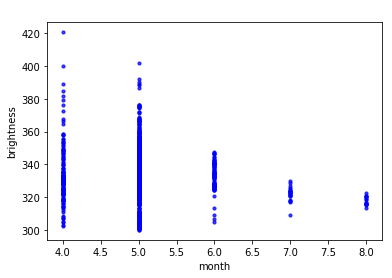

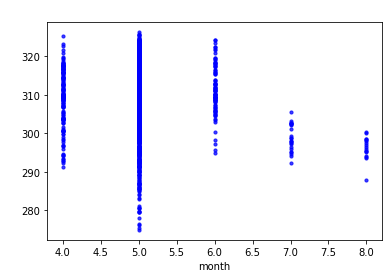

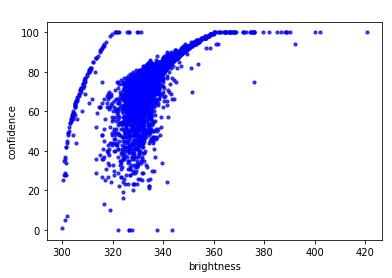

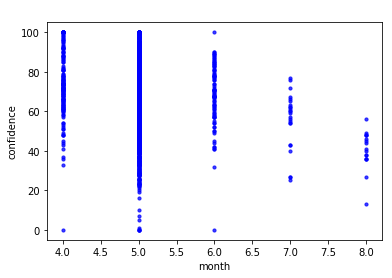

In [60]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75) 
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

scatterplot(y3,y1,'month','brightness')
scatterplot(y3,y2,'month')
scatterplot(y1,y4,'brightness','confidence')
scatterplot(y3,y4,'month','confidence')

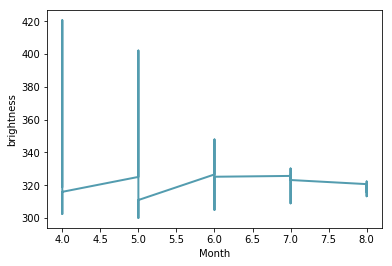

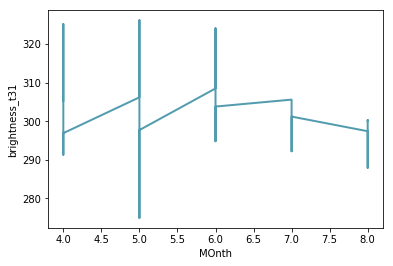

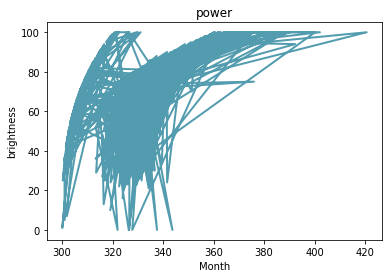

In [58]:

def lineplot(y1, y2, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    ax.plot(y1, y2, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label) 

lineplot(y3,y1,"Month","brightness")
lineplot(y3,y2,"MOnth","brightness_t31")
lineplot(y1,y4,"Month","brightness","power")

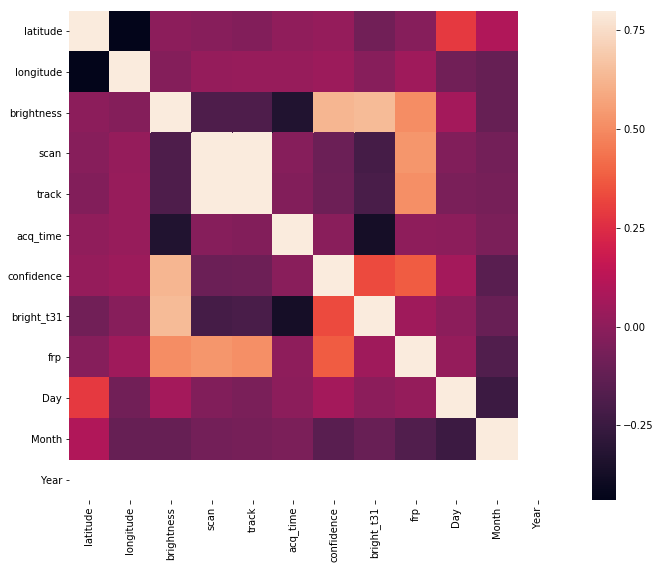

In [4]:
cormat=data.corr()
fig=plt.figure(figsize =(12,9))
sns.heatmap(cormat,vmax=.8,square=True)
plt.show()